Source for the dataset:
www.kaggle.com/c/dog-breed-identification    

In [ ]:
#Importing Tensorflow
import tensorflow as tf
import tensorflow_hub as hub

print("Tensorflow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)

Tensorflow version: 2.15.0
TensorFlow Hub version: 0.15.0


In [ ]:
#GPU availability
print("GPU available" if tf.config.list_physical_devices("GPU") else "Not available")

GPU available


In [ ]:
competition_name = "dog-breed-identification"

# Mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive")

#kaggle_creds_path = ""
kaggle_creds_path = "/content/drive/MyDrive/kaggle.json"

! pip install kaggle --quiet

! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c {competition_name}

! mkdir kaggle_data
! unzip {competition_name + ".zip"} -d kaggle_data

# Unmount your Google Drive
drive.flush_and_unmount()

Streaming output truncated to the last 5000 lines.
  inflating: kaggle_data/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: kaggle_data/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: kaggle_data/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: kaggle_data/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: kaggle_data/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: kaggle_data/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: kaggle_data/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: kaggle_data/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: kaggle_data/train/83fad0718581a696132c96c166472627.jpg  
  inflating: kaggle_data/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: kaggle_data/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: kaggle_data/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: kaggle_data/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: kaggle_data/train/840db91b

In [ ]:
#Loading the labels
import pandas as pd
labels_csv = pd.read_csv("kaggle_data/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
#How many images are there for each breed?
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

<Axes: >

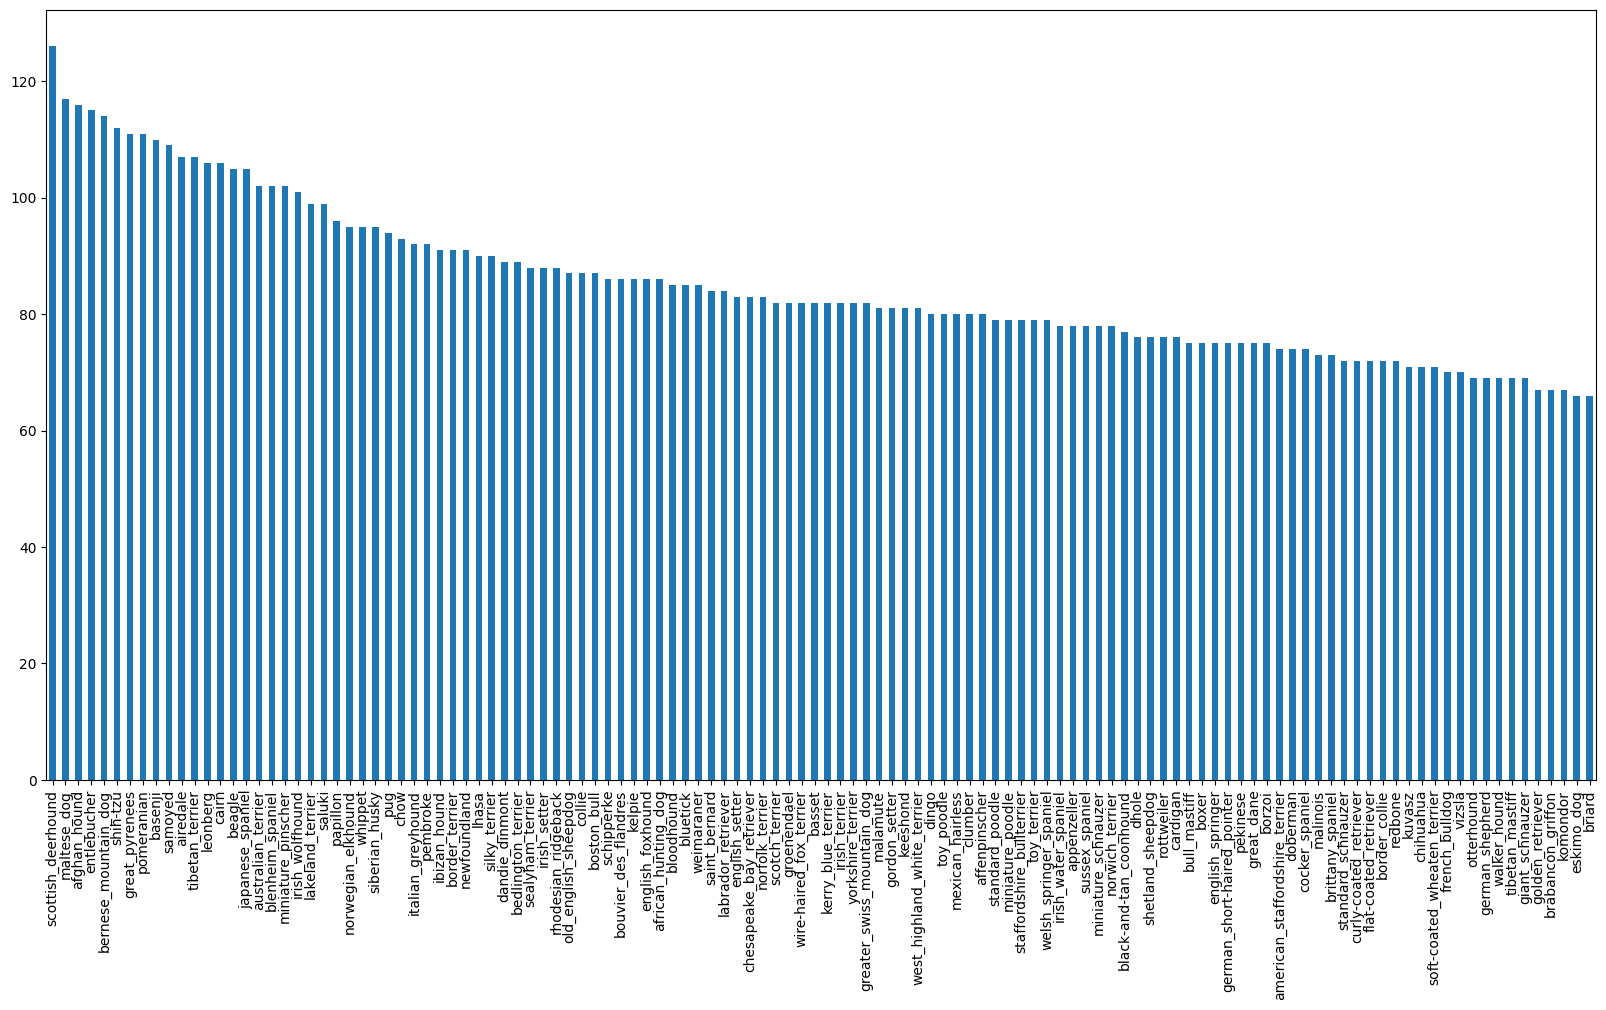

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [ ]:
labels_csv["breed"].value_counts().mean()

85.18333333333334

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

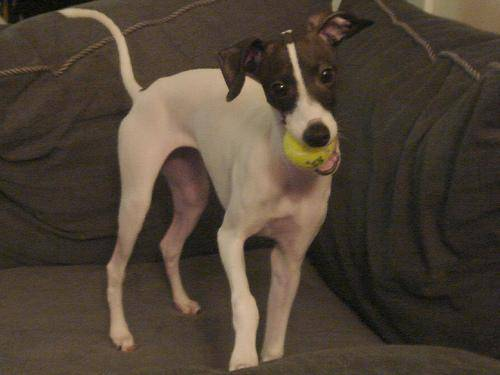

In [ ]:
#View aqn image using IPython
from IPython.display import Image
Image("kaggle_data/train/feb9d0ae525ca28aabff74b455e34c16.jpg")

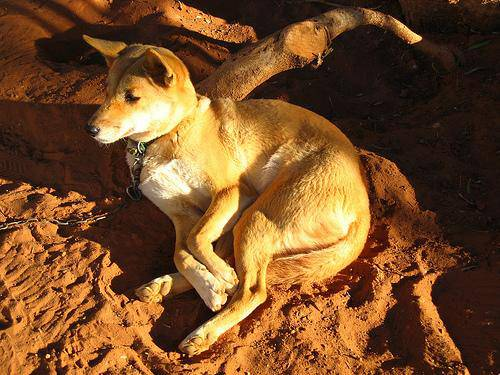

In [ ]:
Image("kaggle_data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [ ]:
#Create list of all images pathnames.

In [ ]:
labels_csv

id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]

In [ ]:
#Create pathnames from image ID's
#filenames = ["drive/My Drive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames = ["kaggle_data/train/" + fname + ".jpg" for fname in labels_csv["id"]]

filenames

['kaggle_data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'kaggle_data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'kaggle_data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'kaggle_data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'kaggle_data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'kaggle_data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'kaggle_data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'kaggle_data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'kaggle_data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'kaggle_data/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'kaggle_data/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'kaggle_data/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'kaggle_data/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'kaggle_data/train/006cc3ddb9dc1bd827479569fcdc52dc.jpg',
 'kaggle_data/train/0075dc49dab4024d12fafe67074d8a81.jpg',
 'kaggle_data/train/00792e341f3c6eb33663e415d0715370.jpg',
 'kaggle_data/train/007b5a16db9d9ff9d7ad39982703e429.jpg

In [ ]:
#Check whether the filanmes matches the actual number of images
import os
if len(os.listdir("kaggle_data/train/")) == len(filenames):
  print("Filenames matches the number of images. You may proceed")
else:
  print("Error. Filenames does not matches the number of images.")

Filenames matches the number of images. You may proceed


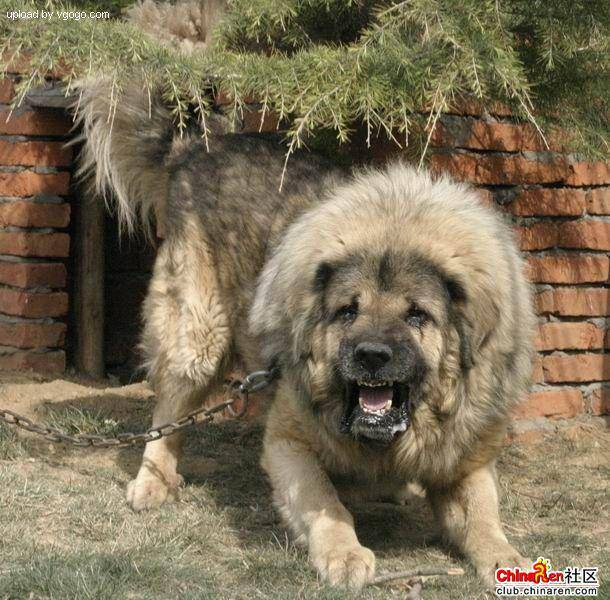

In [ ]:
Image(filenames[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [ ]:
#Let's prepare the lables.
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
if len(labels) == len(filenames):
  print("Number of labels matches the number of filenames.")
else:
  print("Number of labels do not match the number of filenames.")

Number of labels matches the number of filenames.


In [ ]:
#Find the number of unique labels.
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
#Turn a label into booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
#Turn every label into boolean array.
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
#Turning the labels into binary integers.
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
filenames[:10]

['kaggle_data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'kaggle_data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'kaggle_data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'kaggle_data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'kaggle_data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'kaggle_data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'kaggle_data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'kaggle_data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'kaggle_data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'kaggle_data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
#Creating our own validation set.

#Setup X and Y variables.
x = filenames
y = boolean_labels

In [ ]:
len(filenames)

10222

In [ ]:
# We will start experimenting with ~1k images and increase as needed
num_images = 1000 #

In [ ]:
#Splitting into train and test set.
from sklearn.model_selection import train_test_split

#Split into the size equal to num_images
x_train, x_val, y_train, y_val = train_test_split(x[:1000],
                                                  y[:1000],
                                                  test_size=0.2,
                                                  random_state=42)

len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
#The training data
x_train[:5], y_train[:2]

(['kaggle_data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'kaggle_data/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'kaggle_data/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'kaggle_data/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'kaggle_data/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, 

In [ ]:
#Preprocessing images (Converting to Tensors)

#Converting image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [ ]:
#turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [ ]:
#Define image size
IMG_SIZE = 224

#Function to preprocess images
def process_image(image_path, img_size = IMG_SIZE):
  #Read
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])

  return image

In [ ]:
#Turn images into batches
#Create a function to return tuple
def get_image_label(image_path, label):
  image = process_image(image_path)
  return(image, label)

In [ ]:
# Demo of the above
(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [ ]:
BATCH_SIZE = 32

def create_data_batches(x , y=None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [ ]:
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
#Visualize data batches
import matplotlib.pyplot as plt

#Create a function to view images in a data batch
def show_25_images(images, labels):

  #Setup the figure
  plt.figure(figsize=(10, 10))
  #Loop through 25 images
  for i in range(25):
    #Create subplots(5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    #Display an image
    plt.imshow(images[i])
    #Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #Turn the gridlines off
    plt.axis("off")

In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

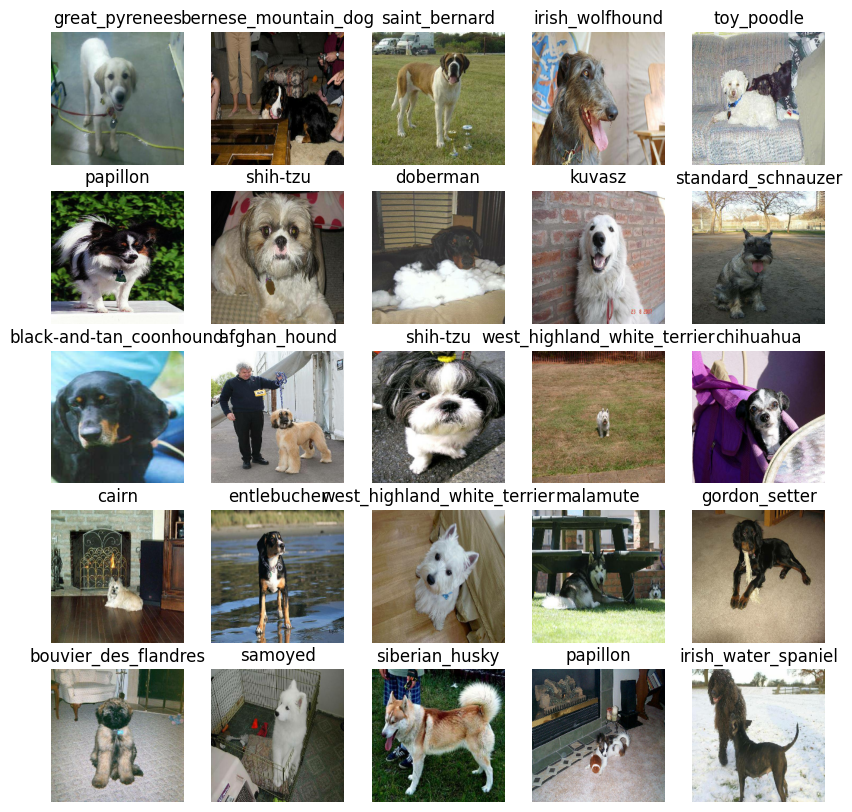

In [ ]:
#Now let's visualize the training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

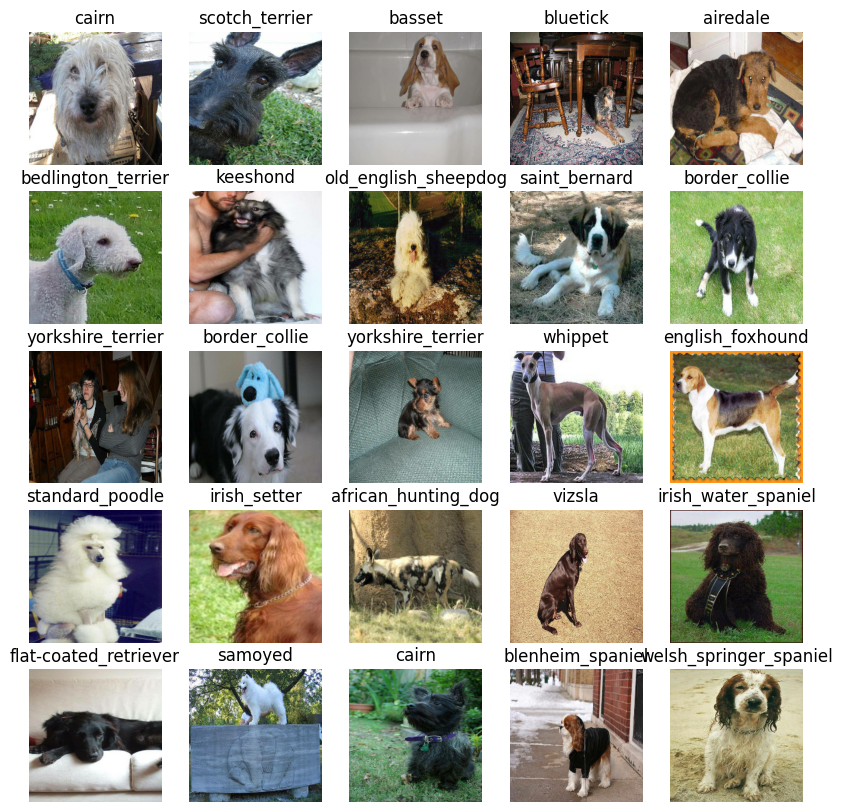

In [ ]:
#Visualize validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [ ]:
#Building a model
IMG_SIZE

224

In [ ]:
#Set up input shape of the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

#Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds)

#Setup model URL from Tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
#Create a foundation which builds on Keras models.
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  #Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), #Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") #Layer 2 (output layer)
  ])

  #Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  #Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [ ]:
#Creating callbacks


In [ ]:
#Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

#Create a fucntion to build Tensorboard callback
def create_tensorboard_callback():
  #Create a log directory for storing Tensorboard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        #Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime(""))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
#Early Stopping Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [ ]:
#Training model on partial dataset
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
# Check to make sure we're still running on a GPU
print("GPU", "available (YESSS!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESSS!!!!!!)


In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 19s 300ms/step - loss: 4.6725 - accuracy: 0.0950 - val_loss: 3.4994 - val_accuracy: 0.2300
Epoch 2/100
25/25 [==============================] - 2s 78ms/step - loss: 1.6991 - accuracy: 0.6662 - val_loss: 2.1986 - val_accuracy: 0.4700
Epoch 3/100
25/25 [==============================] - 2s 96ms/step - loss: 0.5967 - accuracy: 0.9337 - val_loss: 1.7023 - val_accuracy: 0.5500
Epoch 4/100
25/25 [==============================] - 2s 66ms/step - loss: 0.2600 - accuracy: 0.9887 - val_loss: 1.5073 - val_accuracy: 0.6000
Epoch 5/100
25/25 [==============================] - 2s 66ms/step - loss: 0.1494 - accuracy: 0.9975 - val_loss: 1.4230 - val_accuracy: 0.6000
Epoch 6/100
25/25 [==============================] - 2s 77ms/step - loss: 0.1020 - accuracy: 0.9987 - val_loss: 1.3815 - val_accuracy: 0.6300
Epoch 7/100
25/25 [==============================] - 

In [ ]:
#Checking TesnroBoard logs
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

<IPython.core.display.Javascript object>

In [ ]:
#Evaluations
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
#Make predictions on the validation data
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 3s 62ms/step


array([[9.3584170e-04, 5.0730312e-05, 8.0081151e-04, ..., 6.2312174e-05,
        1.0968626e-05, 1.3248209e-03],
       [6.3262152e-04, 4.0428489e-04, 6.3583389e-02, ..., 2.8262948e-04,
        9.5232530e-03, 1.4376047e-04],
       [2.6342963e-05, 2.0195723e-04, 5.5123569e-04, ..., 2.0517554e-04,
        1.5192312e-04, 6.5602292e-04],
       ...,
       [1.8904462e-05, 5.6727582e-05, 1.8535211e-05, ..., 2.0577903e-05,
        1.3659353e-04, 9.2438262e-05],
       [8.1353198e-04, 1.9231113e-05, 2.1569878e-04, ..., 2.5403424e-05,
        4.0778592e-05, 3.0231368e-02],
       [1.5763249e-04, 1.0272850e-04, 1.3137490e-03, ..., 1.2311612e-02,
        7.8460446e-04, 3.0284555e-04]], dtype=float32)

In [ ]:
predictions[0]

array([9.3584170e-04, 5.0730312e-05, 8.0081151e-04, 8.9296802e-05,
       8.1380145e-05, 1.3139226e-05, 1.7816430e-02, 1.7523913e-04,
       2.5728642e-04, 1.1884159e-03, 2.8044224e-04, 1.6153186e-05,
       9.7323413e-05, 2.1107386e-05, 2.6701635e-04, 5.0289446e-04,
       5.3596865e-05, 2.1498871e-01, 1.0403974e-04, 7.7678880e-05,
       1.9764469e-03, 1.8175178e-04, 3.3355545e-06, 1.1769466e-03,
       2.7145565e-05, 3.6831982e-05, 2.6645875e-01, 2.1787064e-05,
       6.8850066e-05, 2.6680483e-04, 1.4118031e-05, 4.9774803e-04,
       2.8120083e-04, 3.6660971e-05, 1.6760374e-04, 3.6981408e-02,
       1.1693136e-05, 7.0297989e-05, 3.5643228e-05, 1.1695569e-03,
       1.3873038e-03, 6.9306830e-06, 4.8304137e-05, 6.3689324e-05,
       2.0771269e-05, 4.6614485e-04, 9.3192393e-06, 4.4121898e-05,
       8.8154350e-04, 2.7900079e-04, 1.9846488e-04, 7.7234705e-05,
       1.7998165e-04, 2.3952020e-05, 2.7402342e-04, 1.7447381e-05,
       5.0521790e-05, 2.1910595e-03, 3.2973799e-03, 4.7474463e

In [ ]:
#First prediction
index = 42
print(predictions[index])
print(f"Max value (probability o0f prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: [unique_breeds[np.argmax(predictions[index])]]")

[1.23740974e-04 3.00426891e-05 5.18746638e-05 4.81234747e-06
 4.90980269e-03 8.82863424e-06 5.65306655e-05 7.83661730e-04
 8.10238812e-03 4.67049703e-02 1.28826132e-05 4.68464168e-06
 1.61586388e-04 5.39317844e-04 9.79153207e-04 3.70447896e-03
 5.88217063e-06 3.84343643e-04 8.48721320e-05 6.16353936e-04
 5.21090988e-05 5.48195967e-04 1.99695060e-05 1.25673487e-05
 1.08277267e-02 2.06703116e-04 7.24961865e-05 6.60313235e-05
 2.98514788e-05 1.12476828e-05 2.70698056e-05 2.68433450e-05
 2.74369449e-05 1.54182908e-05 2.44799394e-05 4.00123390e-05
 4.68761646e-05 3.24379827e-04 1.67051439e-05 1.01516239e-01
 9.39569800e-05 1.91722047e-05 2.78724195e-03 7.39844018e-06
 2.87960975e-05 1.30623184e-05 1.35335082e-04 2.33913452e-04
 1.53043475e-05 1.16295341e-04 3.40283477e-05 5.86415481e-05
 1.15266696e-04 1.68207171e-03 1.74067088e-06 2.23324198e-04
 2.47381337e-04 1.63732420e-05 2.78458348e-04 5.62971181e-05
 1.80993466e-05 2.25295022e-04 1.54895952e-05 6.58325662e-05
 2.54825300e-05 1.517656

In [ ]:
unique_breeds[113]

'walker_hound'

In [ ]:
#Turn prediction probabilities into their respective labels
def get_pred_label(prediction_probabilities):
  """
  Turns an array of predictions into labels.
  """

  return unique_breeds[np.argmax(prediction_probabilities)]

#Get predicted labels
pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
#Function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset and returns separate arrays of images and labels
  """
  images = []
  labels = []

  #Loop through batched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

#Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_labels[0], val_labels[0]

('cairn', 'cairn')

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

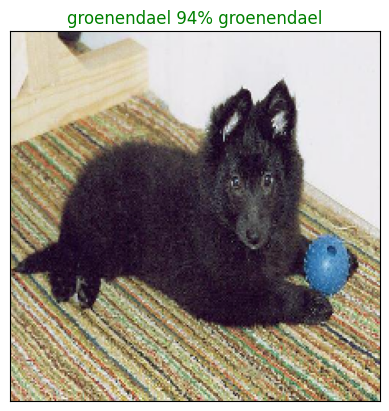

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

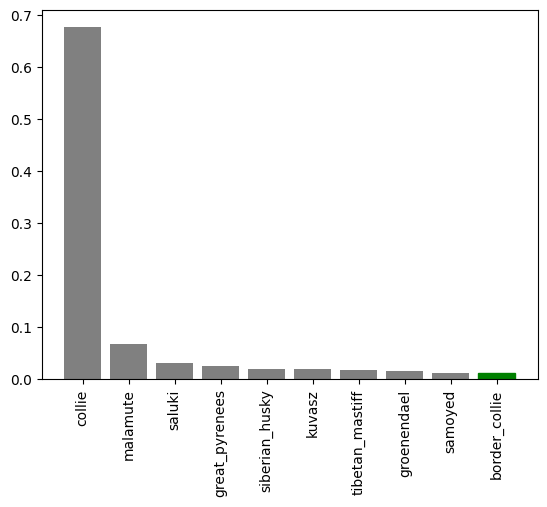

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

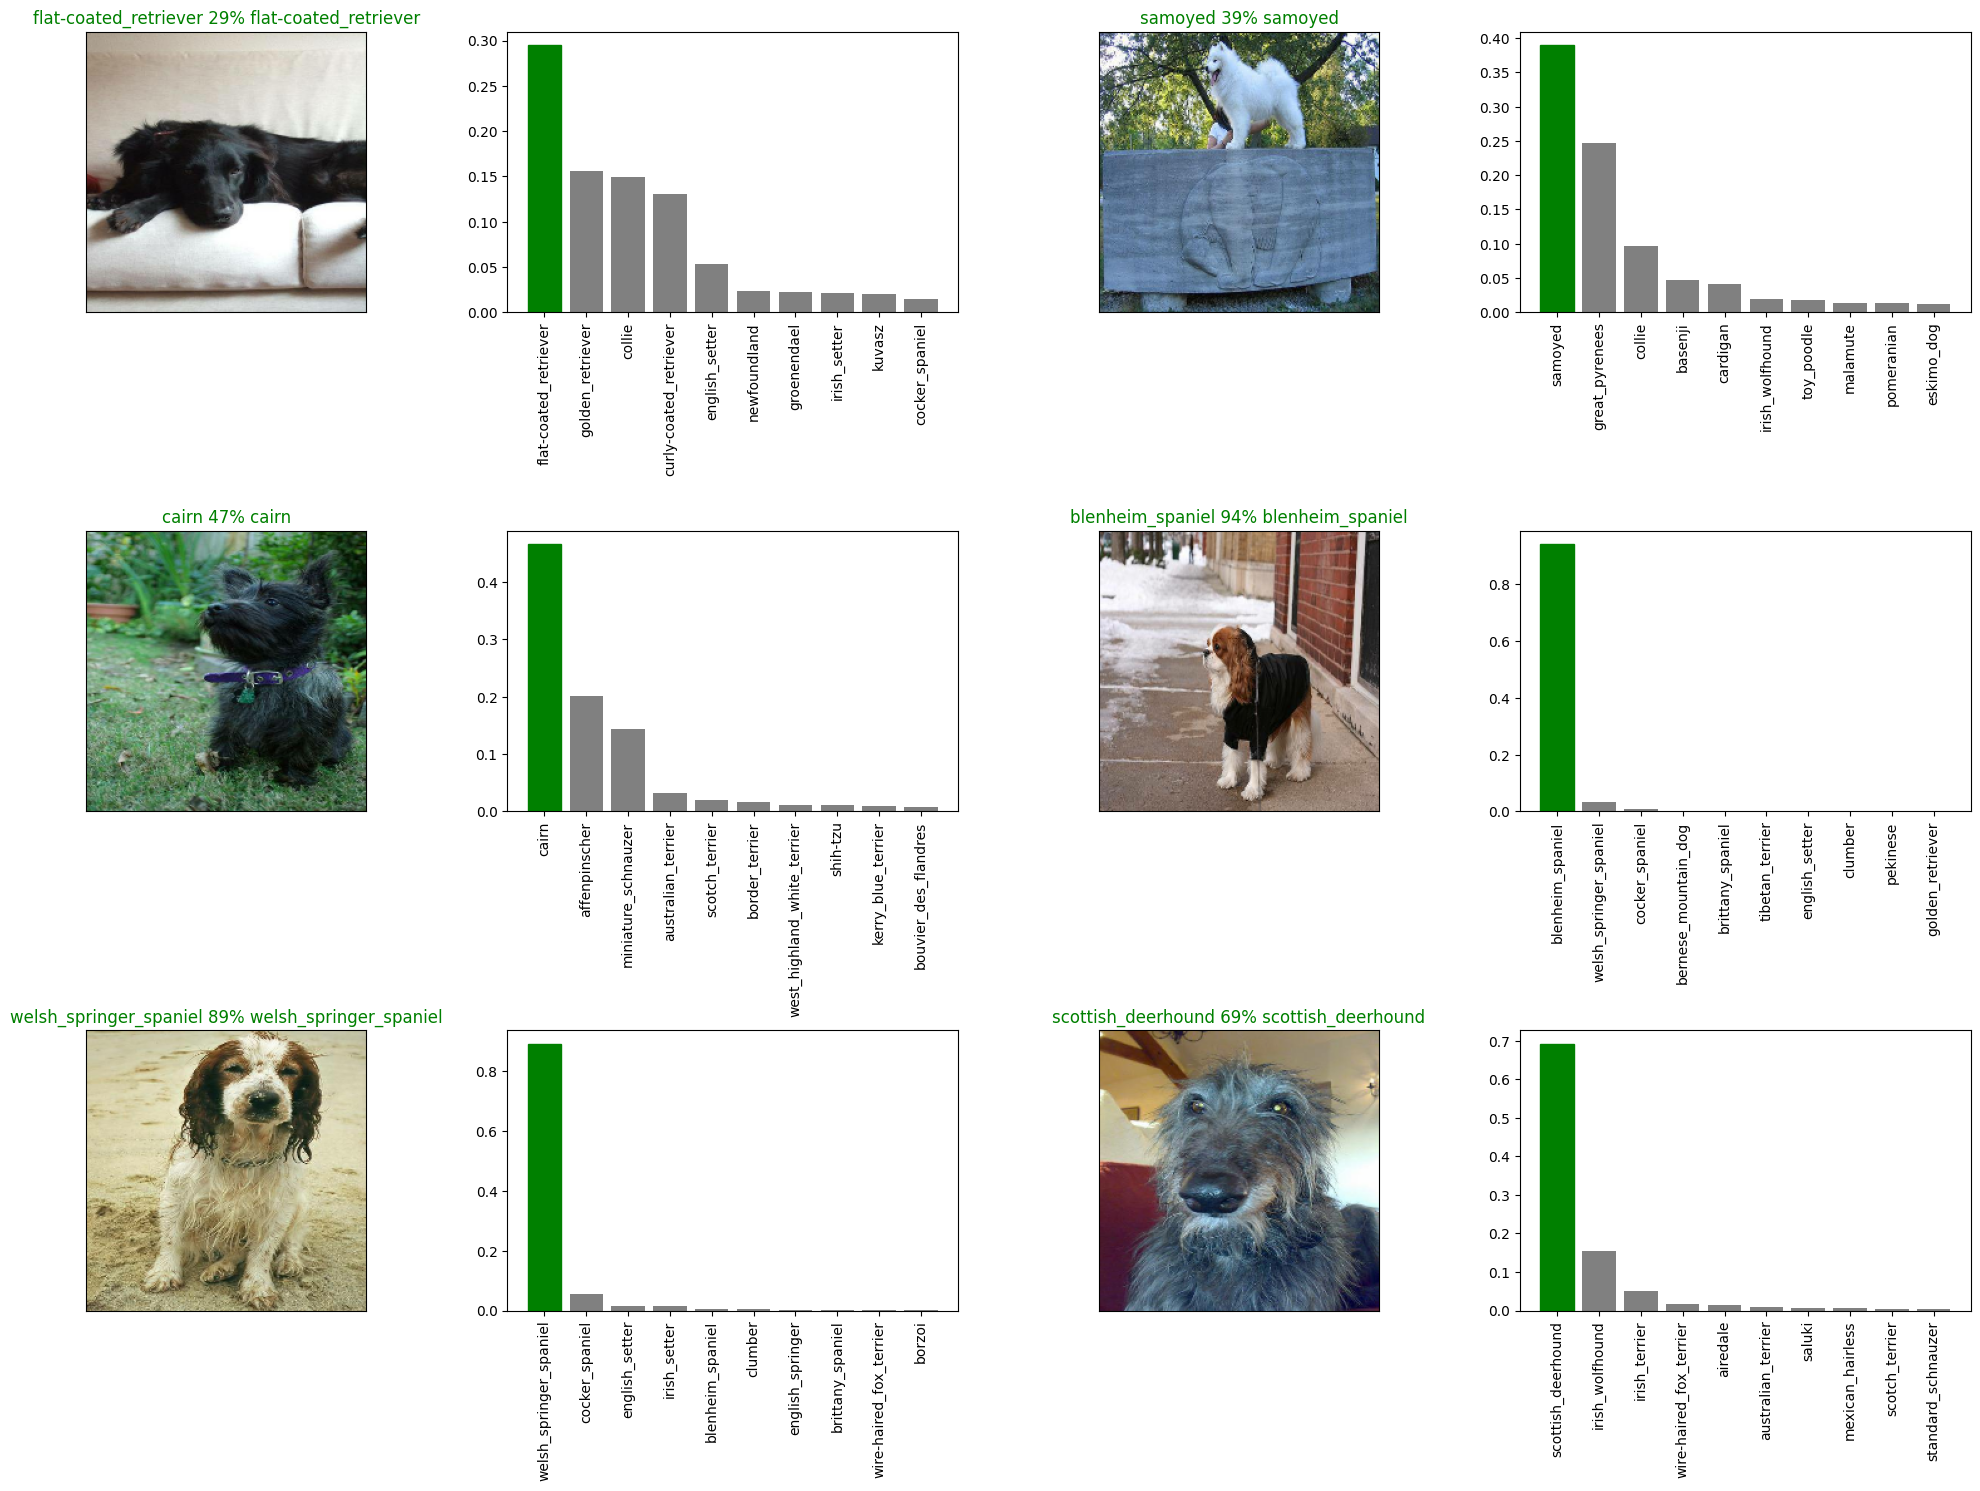

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()


In [ ]:
#Saving a reloading a model
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog Vision/models/20231224-18511703443904-1000-images-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/My Drive/Dog Vision/models/20231224-18511703443904-1000-images-mobilenetv2-Adam.h5'

In [ ]:
# Load a trained model
loaded_1000_image_model = load_model('drive/My Drive/Dog Vision/models/20231224-18511703443904-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20231224-18511703443904-1000-images-mobilenetv2-Adam.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 0s 49ms/step - loss: 1.2426 - accuracy: 0.6650


[1.242579460144043, 0.6650000214576721]

In [ ]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 49ms/step - loss: 1.2426 - accuracy: 0.6650


[1.242579460144043, 0.6650000214576721]

In [ ]:
#Training a big dog model on the full dataset
len(x), len(y)

(10222, 10222)

In [ ]:
# Create a data batch with the full data set
full_data = create_data_batches(x, y)

Creating training data batches...


In [ ]:
full_data


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 23s 60ms/step - loss: 1.3333 - accuracy: 0.6711
Epoch 2/100
320/320 [==============================] - 18s 56ms/step - loss: 0.3969 - accuracy: 0.8826
Epoch 3/100
320/320 [==============================] - 27s 83ms/step - loss: 0.2330 - accuracy: 0.9368
Epoch 4/100
320/320 [==============================] - 19s 61ms/step - loss: 0.1520 - accuracy: 0.9666
Epoch 5/100
320/320 [==============================] - 18s 57ms/step - loss: 0.1053 - accuracy: 0.9803
Epoch 6/100
320/320 [==============================] - 22s 69ms/step - loss: 0.0770 - accuracy: 0.9867
Epoch 7/100
320/320 [==============================] - 18s 57ms/step - loss: 0.0575 - accuracy: 0.9921
Epoch 8/100
320/320 [==============================] - 20s 61ms/step - loss: 0.0465 - accuracy: 0.9940
Epoch 9/100
320/320 [==============================] - 20s 63ms/step - loss: 0.0367 - accuracy: 0.9961
Epoch 10/100
320/320 [==============================] - 18s 57ms/step - l

In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog Vision/models/20231224-19001703444412-full-image-set-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20231224-19001703444412-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
# Load in the full model
loaded_full_model = load_model('drive/My Drive/Dog Vision/models/20231224-19001703444412-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20231224-19001703444412-full-image-set-mobilenetv2-Adam.h5


In [ ]:
#Testing the data
# Load test image filenames
test_path = "/content/kaggle_data/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/kaggle_data/test/3a0c9b685e4b93e40c4f7e1dff3e2352.jpg',
 '/content/kaggle_data/test/22a524ec5efe207d70753917b48d50f6.jpg',
 '/content/kaggle_data/test/3df624b9038c1322cba1db52fa3547e2.jpg',
 '/content/kaggle_data/test/8789588381a7f1b3970d974c9013637e.jpg',
 '/content/kaggle_data/test/bf6271e6ee74ea64502dc3b6c3ca7121.jpg',
 '/content/kaggle_data/test/e411a1b3681604f6321af7cb8e8f2de7.jpg',
 '/content/kaggle_data/test/90a3e77e8802823f857c32d281f3397b.jpg',
 '/content/kaggle_data/test/92e9917a19f9a606cc786cfb31677c9a.jpg',
 '/content/kaggle_data/test/3236f7d9c22ba920be690180a0ed84bd.jpg',
 '/content/kaggle_data/test/69922e58dbe25660e65e1c924937d74d.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data)

324/324 [==============================] - 21s 65ms/step


In [ ]:
# Save predictions (NumPy array) to csv file (for access later)
#np.savetxt("drive/My Drive/Dog Vision/preds_array.csv", test_predctions, delimiter=",")

In [ ]:
# Load predictions (NumPy array) from csv file
#test_predictions = np.loadtxt("drive/My Drive/Dog Vision/preds_array.csv", delimiter=",")

In [ ]:
test_predictions[:10]

array([[1.8480174e-12, 3.4360993e-13, 4.3028279e-13, ..., 3.5069641e-14,
        5.0899479e-10, 3.9167045e-15],
       [3.1489574e-07, 3.3197913e-11, 3.2008329e-10, ..., 5.3067321e-11,
        2.3104734e-07, 1.7064990e-06],
       [2.2564199e-09, 1.3082997e-06, 2.0780752e-07, ..., 1.7048658e-10,
        5.6913012e-09, 3.0052193e-04],
       ...,
       [8.6896801e-12, 7.4961794e-11, 3.1953953e-12, ..., 2.4530763e-08,
        2.1600409e-03, 5.9029759e-10],
       [7.1399408e-13, 1.3314498e-10, 1.2351848e-07, ..., 2.8705269e-09,
        1.6144705e-08, 2.7851514e-09],
       [1.5371843e-10, 8.2123677e-08, 6.2619284e-13, ..., 2.0412713e-11,
        1.8013960e-10, 3.6730518e-11]], dtype=float32)

In [ ]:
test_predictions.shape

(10357, 120)

In [ ]:
#Test dataset predictions for Kaggle
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [ ]:
preds_df.head()

id affenpinscher afghan_hound  \
0  3a0c9b685e4b93e40c4f7e1dff3e2352           NaN          NaN   
1  22a524ec5efe207d70753917b48d50f6           NaN          NaN   
2  3df624b9038c1322cba1db52fa3547e2           NaN          NaN   
3  8789588381a7f1b3970d974c9013637e           NaN          NaN   
4  bf6271e6ee74ea64502dc3b6c3ca7121           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  3a0c9b685e4b93e40c4f7e1dff3e2352   1.848017e-12  3.436099e-13   
1  22a524ec5efe207d70753917b48d50f6   3.148957e-07  3.319791e-11   
2  3df624b9038c1322cba1db52fa3547e2   2.256420e-09  1.308300e-06   
3  8789588381a7f1b3970d974c9013637e   2.400917e-15  5.306892e-11   
4  bf6271e6ee74ea64502dc3b6c3ca7121   9.568183e-10  2.916453e-08   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         4.302828e-13  5.543991e-14                    9.470461e-11   
1         3.200833e-10  3.733530e-12                    8.008747e-11   
2         2.078075e-07  8.586898e-09                    3.727035e-08   
3         4.621801e-15  3.296946e-12                    5.615336e-16   
4         8.036728e-10  1.117937e-08                    4.370710e-10   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  2.883392e-10        3.362385e-09  1.090134e-05  2.210301e-10  ...   
1  1.023415e-06        1.896760e-10  3.318483e-10  3.127762e-12  ...   
2  1.072226e-08        1.116158e-02  2.559539e-08  9.483946e-10  ...   
3  3.796717e-15        6.957066e-12  2.247556e-14  1.675275e-07  ...   
4  1.842514e-10        3.301779e-10  1.229630e-12  2.865540e-10  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  3.137556e-13  8.468308e-11  3.140472e-13  1.594593e-11  1.227748e-12   
1  1.778441e-08  4.410848e-06  2.259009e-08  5.590244e-09  1.040853e-09   
2  1.820926e-06  2.594911e-08  1.331298e-07  1.793508e-11  1.846276e-08   
3  1.057341e-12  1.642901e-15  2.694371e-12  3.013142e-11  5.931704e-15   
4  3.283248e-09  6.935787e-10  1.979293e-12  2.888637e-10  3.280177e-06   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            5.008940e-11                 3.715642e-13  3.506964e-14   
1            2.080552e-09                 5.828658e-08  5.306732e-11   
2            4.245739e-07                 1.926199e-07  1.704866e-10   
3            4.822492e-13                 3.910969e-14  2.467290e-14   
4            2.188517e-09                 8.239150e-11  5.409120e-11   

   wire-haired_fox_terrier  yorkshire_terrier  
0             5.089948e-10       3.916704e-15  
1             2.310473e-07       1.706499e-06  
2             5.691301e-09       3.005219e-04  
3             6.042646e-14       3.462933e-13  
4             3.028254e-13       8.921058e-11  

[5 rows x 121 columns]

In [ ]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [ ]:
preds_df.head()

id  affenpinscher  afghan_hound  \
0  3a0c9b685e4b93e40c4f7e1dff3e2352   1.848017e-12  3.436099e-13   
1  22a524ec5efe207d70753917b48d50f6   3.148957e-07  3.319791e-11   
2  3df624b9038c1322cba1db52fa3547e2   2.256420e-09  1.308300e-06   
3  8789588381a7f1b3970d974c9013637e   2.400917e-15  5.306892e-11   
4  bf6271e6ee74ea64502dc3b6c3ca7121   9.568183e-10  2.916453e-08   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         4.302828e-13  5.543991e-14                    9.470461e-11   
1         3.200833e-10  3.733530e-12                    8.008747e-11   
2         2.078075e-07  8.586898e-09                    3.727035e-08   
3         4.621801e-15  3.296946e-12                    5.615336e-16   
4         8.036728e-10  1.117937e-08                    4.370710e-10   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  2.883392e-10        3.362385e-09  1.090134e-05  2.210301e-10  ...   
1  1.023415e-06        1.896760e-10  3.318483e-10  3.127762e-12  ...   
2  1.072226e-08        1.116158e-02  2.559539e-08  9.483946e-10  ...   
3  3.796717e-15        6.957066e-12  2.247556e-14  1.675275e-07  ...   
4  1.842514e-10        3.301779e-10  1.229630e-12  2.865540e-10  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  3.137556e-13  8.468308e-11  3.140472e-13  1.594593e-11  1.227748e-12   
1  1.778441e-08  4.410848e-06  2.259009e-08  5.590244e-09  1.040853e-09   
2  1.820926e-06  2.594911e-08  1.331298e-07  1.793508e-11  1.846276e-08   
3  1.057341e-12  1.642901e-15  2.694371e-12  3.013142e-11  5.931704e-15   
4  3.283248e-09  6.935787e-10  1.979293e-12  2.888637e-10  3.280177e-06   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            5.008940e-11                 3.715642e-13  3.506964e-14   
1            2.080552e-09                 5.828658e-08  5.306732e-11   
2            4.245739e-07                 1.926199e-07  1.704866e-10   
3            4.822492e-13                 3.910969e-14  2.467290e-14   
4            2.188517e-09                 8.239150e-11  5.409120e-11   

   wire-haired_fox_terrier  yorkshire_terrier  
0             5.089948e-10       3.916704e-15  
1             2.310473e-07       1.706499e-06  
2             5.691301e-09       3.005219e-04  
3             6.042646e-14       3.462933e-13  
4             3.028254e-13       8.921058e-11  

[5 rows x 121 columns]

In [ ]:
# Adding the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  3a0c9b685e4b93e40c4f7e1dff3e2352   1.848017e-12  3.436099e-13   
1  22a524ec5efe207d70753917b48d50f6   3.148957e-07  3.319791e-11   
2  3df624b9038c1322cba1db52fa3547e2   2.256420e-09  1.308300e-06   
3  8789588381a7f1b3970d974c9013637e   2.400917e-15  5.306892e-11   
4  bf6271e6ee74ea64502dc3b6c3ca7121   9.568183e-10  2.916453e-08   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         4.302828e-13  5.543991e-14                    9.470461e-11   
1         3.200833e-10  3.733530e-12                    8.008747e-11   
2         2.078075e-07  8.586898e-09                    3.727035e-08   
3         4.621801e-15  3.296946e-12                    5.615336e-16   
4         8.036728e-10  1.117937e-08                    4.370710e-10   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  2.883392e-10        3.362385e-09  1.090134e-05  2.210301e-10  ...   
1  1.023415e-06        1.896760e-10  3.318483e-10  3.127762e-12  ...   
2  1.072226e-08        1.116158e-02  2.559539e-08  9.483946e-10  ...   
3  3.796717e-15        6.957066e-12  2.247556e-14  1.675275e-07  ...   
4  1.842514e-10        3.301779e-10  1.229630e-12  2.865540e-10  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  3.137556e-13  8.468308e-11  3.140472e-13  1.594593e-11  1.227748e-12   
1  1.778441e-08  4.410848e-06  2.259009e-08  5.590244e-09  1.040853e-09   
2  1.820926e-06  2.594911e-08  1.331298e-07  1.793508e-11  1.846276e-08   
3  1.057341e-12  1.642901e-15  2.694371e-12  3.013142e-11  5.931704e-15   
4  3.283248e-09  6.935787e-10  1.979293e-12  2.888637e-10  3.280177e-06   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            5.008940e-11                 3.715642e-13  3.506964e-14   
1            2.080552e-09                 5.828658e-08  5.306732e-11   
2            4.245739e-07                 1.926199e-07  1.704866e-10   
3            4.822492e-13                 3.910969e-14  2.467290e-14   
4            2.188517e-09                 8.239150e-11  5.409120e-11   

   wire-haired_fox_terrier  yorkshire_terrier  
0             5.089948e-10       3.916704e-15  
1             2.310473e-07       1.706499e-06  
2             5.691301e-09       3.005219e-04  
3             6.042646e-14       3.462933e-13  
4             3.028254e-13       8.921058e-11  

[5 rows x 121 columns]

In [ ]:
# Save our predictions dataframe to CSV for submission to Kaggle
preds_df.to_csv("drive/My Drive/Dog Vision/full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)